# ParaScore Model Comparison

This notebook is used to compare the output of several ParaScore models on the same files. The models i will be comparing are:
* bert-base-uncased
* modernBERT-base
* modernBERT-large

In [1]:
import os
import glob
import pandas as pd

In [2]:
run "../read_and_write_docs.py"

In [3]:
base_loc = "/Volumes/BCross/parascore_temp"

# Enron
enron_bbu = f"{base_loc}/enron_bert_base_uncased/"
enron_mbb = f"{base_loc}/enron_modernBERT_base/"
enron_mbl = f"{base_loc}/enron_modernBERT_large"

# Wiki


## Load Data

In [4]:
def read_all_jsonl_files(directory):
    """
    Reads all .jsonl files in a given directory, adds a 'model_name' column with the provided model_name,
    and returns a single concatenated DataFrame. Assumes that each JSONL file already includes a 'doc_id'
    column containing the file name.
    
    Parameters:
        directory (str): Path to the directory containing .jsonl files.
        
    Returns:
        pandas.DataFrame: Concatenated DataFrame with data from all .jsonl files.
    """
    # Construct the file search pattern and retrieve a list of files
    file_pattern = os.path.join(directory, '*.jsonl')
    files = glob.glob(file_pattern)
    
    # Initialize an empty list to hold the DataFrames
    dataframes = []
    
    # Process each file individually
    for file in files:
        # Read the file using the custom read_jsonl function
        df = read_jsonl(file)
        
        # Reorder columns as desired
        df = df[['doc_id', 'corpus', 'tokens', 'original', 'rephrased', 'parascore_free']]
        
        dataframes.append(df)
    
    # Directly return the concatenated DataFrame
    return pd.concat(dataframes, ignore_index=True)

### Load and Combine

Below i load each of the datasets and then combine into a single dataset before saving. I have commented this part out as it is quicker to just load the combined data once it has been saved.

In [5]:
# enron_orig = read_all_jsonl_files(enron_bbu)
# enron_orig.rename(columns={'parascore_free':'bbu_parascore'}, inplace=True)
# enron_orig_row_count = enron_orig.shape[0]

In [6]:
# enron_mbert = read_all_jsonl_files(enron_mbb)
# enron_mbert.rename(columns={'parascore_free':'mbb_parascore'}, inplace=True)
# enron_mbert_row_count = enron_mbert.shape[0]

In [7]:
# enron_mbert_l = read_all_jsonl_files(enron_mbl)
# enron_mbert_l.rename(columns={'parascore_free':'mbl_parascore'}, inplace=True)
# enron_mbert_l_row_count = enron_mbert_l.shape[0]

In [8]:
# merged_df = pd.merge(enron_orig, enron_mbert, on=['doc_id', 'corpus', 'tokens', 'original', 'rephrased'], how='inner')
# merged_df = pd.merge(merged_df, enron_mbert_l, on=['doc_id', 'corpus', 'tokens', 'original', 'rephrased'], how='inner')
# merged_df['trunc'] = (merged_df['tokens'] > 512).astype(int)

In [9]:
# merged_df['trunc'] = (merged_df['tokens'] > 512).astype(int)

In [10]:
# print(f"Rows in original ParaScore dataset: {enron_orig_row_count}")
# print(f"Rows in ModernBERT ParaScore dataset: {enron_mbert_row_count}")
# print(f"Rows in ModernBERT Large ParaScore dataset: {enron_mbert_l_row_count}")

# if enron_orig_row_count == enron_mbert_row_count == enron_mbert_l_row_count:
#     print("All three datasets have the same row count.")
# else:
#     print("The datasets have different row counts.")

In [11]:
# write_jsonl(merged_df, f"{base_loc}/merged_enron_ps.jsonl")

### Load the Combined Data

In [12]:
df = read_jsonl(f"{base_loc}/merged_enron_ps.jsonl")

In [16]:
df[df['trunc'] == 0]

,doc_id,corpus,tokens,original,rephrased,bbu_parascore,mbb_parascore,mbl_parascore,trunc
50830,jeff_skilling_mail_5,Enron,437,We hope that everyone will utilize this outsta...,We sincerely encourage everyone to make full u...,0.814454,0.914676,0.867863,0
50831,jeff_skilling_mail_5,Enron,437,We hope that everyone will utilize this outsta...,We sincerely encourage everyone to make use of...,0.806013,0.909823,0.859474,0
50832,jeff_skilling_mail_5,Enron,437,We hope that everyone will utilize this outsta...,We encourage everyone to make use of this exce...,0.819215,0.909678,0.866085,0
50833,jeff_skilling_mail_5,Enron,437,We hope that everyone will utilize this outsta...,We sincerely encourage everyone to take advant...,0.815278,0.908113,0.861360,0
50834,jeff_skilling_mail_5,Enron,437,We hope that everyone will utilize this outsta...,We encourage everyone to take full advantage o...,0.822784,0.912440,0.867203,0
...,...,...,...,...,...,...,...,...,...
76635,d_steffes_mail_1,Enron,507,Rick Shapiro has offered to present. I think t...,Rick Shapiro has agreed to take on the role of...,0.813632,0.943188,0.871732,0
76636,d_steffes_mail_1,Enron,507,Rick Shapiro has offered to present. I think t...,Rick Shapiro has volunteered to deliver a pres...,0.831197,0.942868,0.879677,0
76637,d_steffes_mail_1,Enron,507,Rick Shapiro has offered to present. I think t...,Rick Shapiro has volunteered to lead a present...,0.823264,0.950240,0.885265,0
76638,d_steffes_mail_1,Enron,507,Rick Shapiro has offered to present. I think t...,Rick Shapiro has agreed to lead a presentation...,0.822366,0.943964,0.876000,0


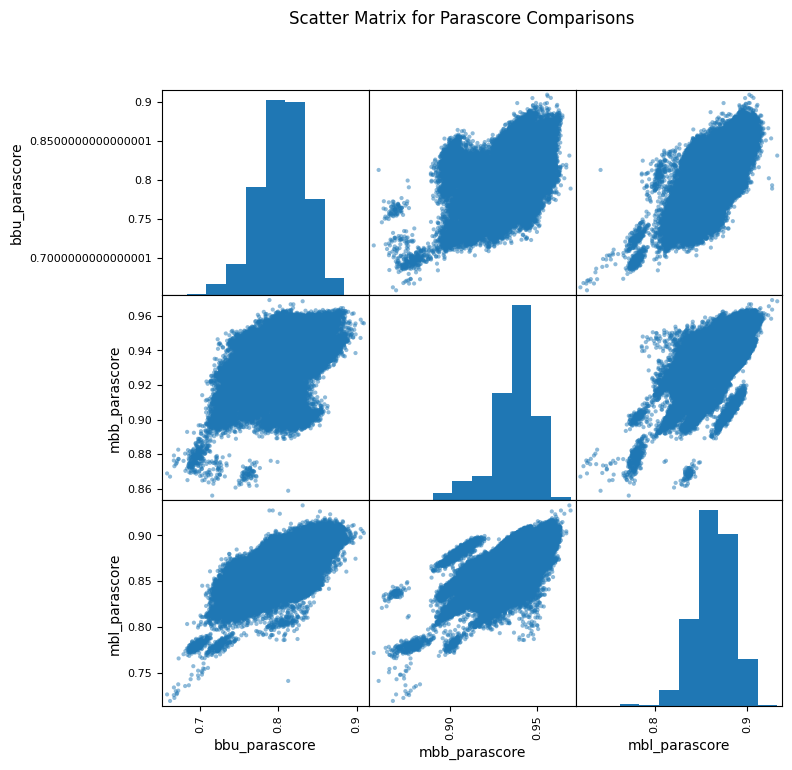

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# Assuming your DataFrame is named df and contains the three columns
cols = ['bbu_parascore', 'mbb_parascore', 'mbl_parascore']

# Create the scatter matrix
scatter_matrix(df[cols], figsize=(8, 8), diagonal='hist')

plt.suptitle("Scatter Matrix for Parascore Comparisons")
plt.show()


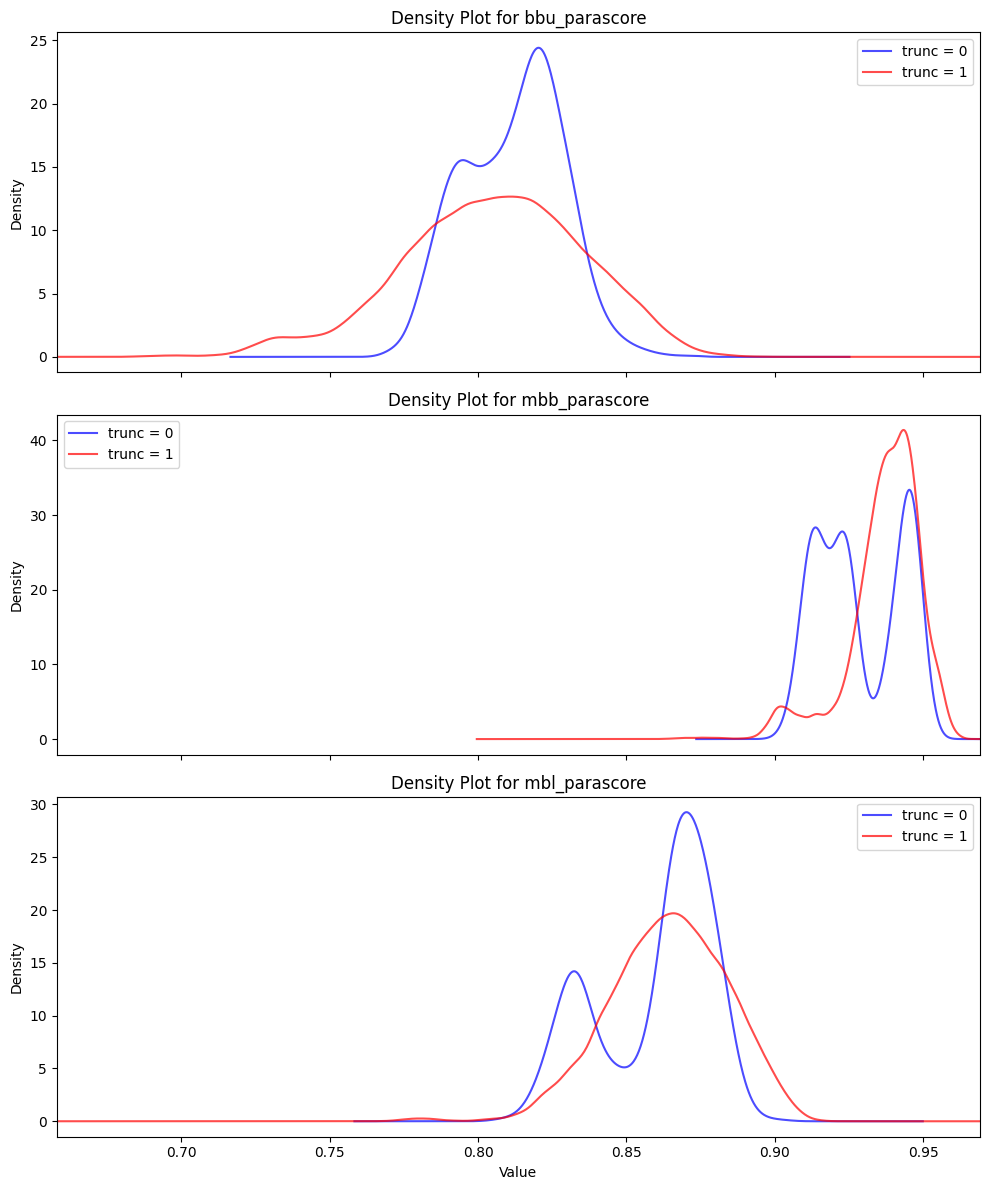

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

cols = ['bbu_parascore', 'mbb_parascore', 'mbl_parascore']

# Determine overall x-axis limits across the three parascore columns
x_min = df[cols].min().min()
x_max = df[cols].max().max()

# Create a figure with 3 subplots (stacked vertically) that share the same x-axis
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 12), sharex=True)

# Define colors for trunc groups
colors = {0: 'blue', 1: 'red'}

for i, col in enumerate(cols):
    ax = axes[i]
    # Plot density for each 'trunc' group for this column
    for trunc_val, group in df.groupby('trunc'):
        group[col].plot(kind='kde', ax=ax, label=f"trunc = {trunc_val}",
                        color=colors.get(trunc_val, 'gray'), alpha=0.7)
    ax.set_title(f"Density Plot for {col}")
    ax.set_xlim(x_min, x_max)  # Ensure the x-axis is consistent across subplots
    ax.legend()

plt.xlabel("Value")
plt.tight_layout()
plt.show()


In [19]:
import pandas as pd
from scipy.stats import ttest_rel

# Paired t-test between bbu_parascore and mbb_parascore
t_stat_bbu_mbb, p_value_bbu_mbb = ttest_rel(df['bbu_parascore'], df['mbb_parascore'])
print(f"Paired t-test between bbu_parascore and mbb_parascore: t-statistic = {t_stat_bbu_mbb:.4f}, p-value = {p_value_bbu_mbb:.4f}")

# Paired t-test between bbu_parascore and mbl_parascore
t_stat_bbu_mbl, p_value_bbu_mbl = ttest_rel(df['bbu_parascore'], df['mbl_parascore'])
print(f"Paired t-test between bbu_parascore and mbl_parascore: t-statistic = {t_stat_bbu_mbl:.4f}, p-value = {p_value_bbu_mbl:.4f}")

# Paired t-test between mbb_parascore and mbl_parascore
t_stat_mbb_mbl, p_value_mbb_mbl = ttest_rel(df['mbb_parascore'], df['mbl_parascore'])
print(f"Paired t-test between mbb_parascore and mbl_parascore: t-statistic = {t_stat_mbb_mbl:.4f}, p-value = {p_value_mbb_mbl:.4f}")


Paired t-test between bbu_parascore and mbb_parascore: t-statistic = -1606.6873, p-value = 0.0000
Paired t-test between bbu_parascore and mbl_parascore: t-statistic = -888.0672, p-value = 0.0000
Paired t-test between mbb_parascore and mbl_parascore: t-statistic = 1589.0623, p-value = 0.0000


In [21]:
# Group the DataFrame by the 'trunc' column and perform paired t-tests within each group
for group, group_df in df.groupby('trunc'):
    print(f"Group: trunc = {group}")
    
    # Compute and print the means for each column in the group
    mean_bbu = group_df['bbu_parascore'].mean()
    mean_mbb = group_df['mbb_parascore'].mean()
    mean_mbl = group_df['mbl_parascore'].mean()
    print(f"  Means: bbu_parascore = {mean_bbu:.4f}, mbb_parascore = {mean_mbb:.4f}, mbl_parascore = {mean_mbl:.4f}")
    
    # Ensure there are enough data points to perform a t-test
    if len(group_df) < 2:
        print("  Not enough data points for t-test.")
        continue

    # Paired t-test between bbu_parascore and mbb_parascore
    t_stat, p_val = ttest_rel(group_df['bbu_parascore'], group_df['mbb_parascore'])
    print(f"  bbu vs. mbb: t-statistic = {t_stat:.4f}, p-value = {p_val:.4f}")
    
    # Paired t-test between bbu_parascore and mbl_parascore
    t_stat, p_val = ttest_rel(group_df['bbu_parascore'], group_df['mbl_parascore'])
    print(f"  bbu vs. mbl: t-statistic = {t_stat:.4f}, p-value = {p_val:.4f}")
    
    # Paired t-test between mbb_parascore and mbl_parascore
    t_stat, p_val = ttest_rel(group_df['mbb_parascore'], group_df['mbl_parascore'])
    print(f"  mbb vs. mbl: t-statistic = {t_stat:.4f}, p-value = {p_val:.4f}")
    print("-" * 50)

Group: trunc = 0
  Means: bbu_parascore = 0.8120, mbb_parascore = 0.9287, mbl_parascore = 0.8597
  bbu vs. mbb: t-statistic = -327.2386, p-value = 0.0000
  bbu vs. mbl: t-statistic = -271.7408, p-value = 0.0000
  mbb vs. mbl: t-statistic = 197.1150, p-value = 0.0000
--------------------------------------------------
Group: trunc = 1
  Means: bbu_parascore = 0.8049, mbb_parascore = 0.9370, mbl_parascore = 0.8640
  bbu vs. mbb: t-statistic = -1585.8911, p-value = 0.0000
  bbu vs. mbl: t-statistic = -873.7511, p-value = 0.0000
  mbb vs. mbl: t-statistic = 1584.3915, p-value = 0.0000
--------------------------------------------------


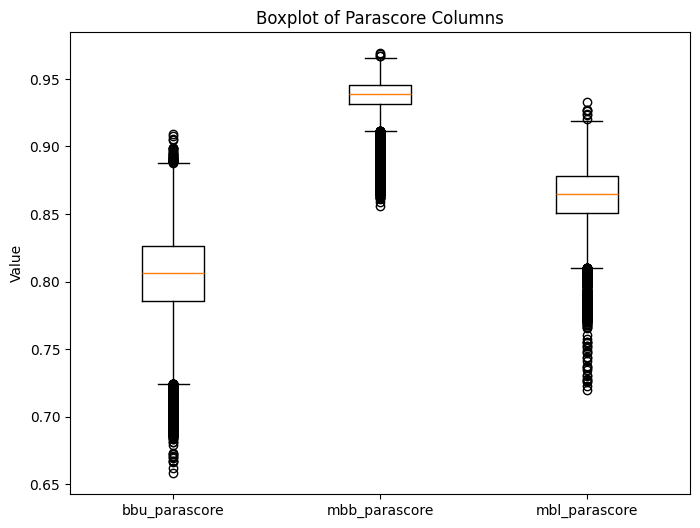

In [22]:
import matplotlib.pyplot as plt

# Assume df is your DataFrame containing the three parascore columns
columns_to_plot = ['bbu_parascore', 'mbb_parascore', 'mbl_parascore']

plt.figure(figsize=(8, 6))
plt.boxplot([df[col] for col in columns_to_plot], labels=columns_to_plot)
plt.title('Boxplot of Parascore Columns')
plt.ylabel('Value')
plt.show()
